# Predicting Flight Delays
The goal of this project is to build a model able to predict flight delays in the month of January. Take some time to understand the data, which airlines have the most percentage of delayed flights? Which airports have the most percentage of delayed flights? Is there any relationship between distance and delay? More info about this data [here](https://www.kaggle.com/divyansh22/flight-delay-prediction)

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Preparation

In [1]:
flights_jan_2019 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFD/data/jan_2019_ontime.csv")
flights_jan_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [2]:
flights_jan_2020 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFD/data/jan_2020_ontime.csv")
flights_jan_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [3]:
flights_jan_2019.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [4]:
flights_jan_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [70]:
flights_jan_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_AIRLINE_ID'}>,
        <AxesSubplot:title={'center':'OP_CARRIER_FL_NUM'}>],
       [<AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'ORIGIN_AIRPORT_SEQ_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_SEQ_ID'}>],
       [<AxesSubplot:title={'center':'DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_DEL15'}>,
        <AxesSubplot:title={'center':'ARR_TIME'}>,
        <AxesSubplot:title={'center':'ARR_DEL15'}>],
       [<AxesSubplot:title={'center':'CANCELLED'}>,
        <AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'Unnamed: 21'}>]], dtype=object)

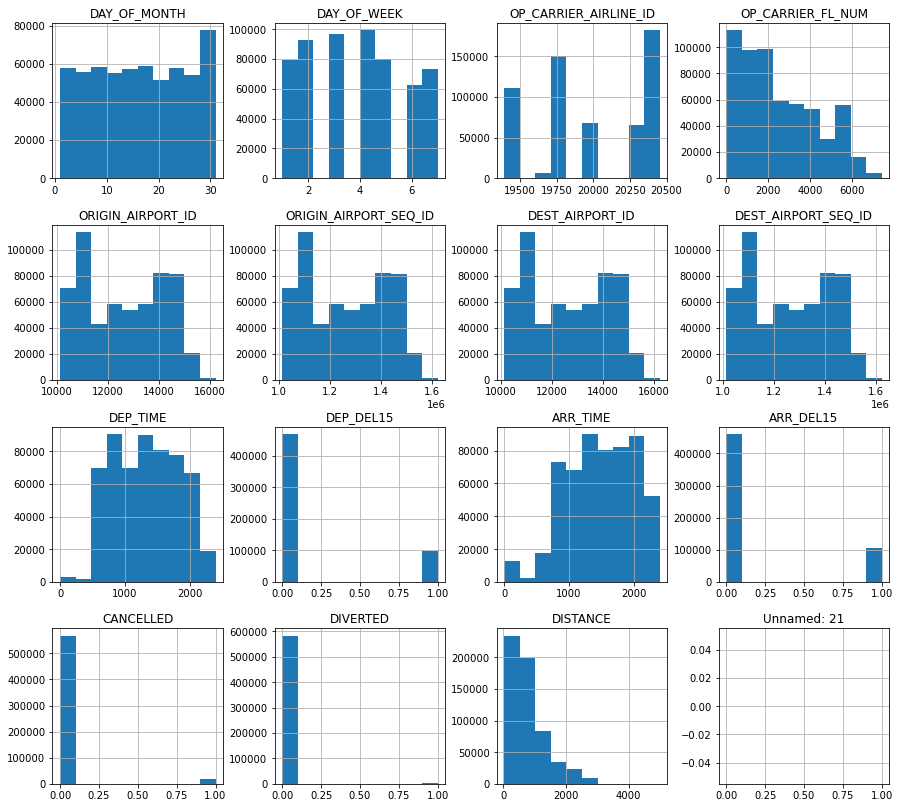

In [5]:
flights_jan_2019.hist(figsize= (15, 14))

In [11]:
flights_jan_2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


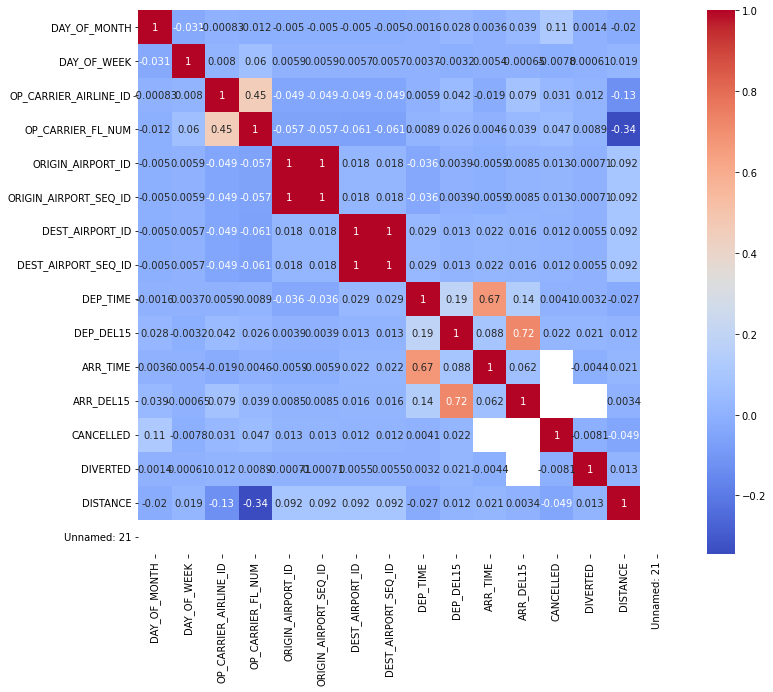

In [13]:
#Collerations between our features:

plt.figure(figsize = (12, 10))
sns.heatmap(flights_jan_2019.corr(), annot = True, cmap = 'coolwarm')
plt.show()

#### The concentration of delay and timely arrivals both on departure and on arrival?

/Users/carolchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/carolchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

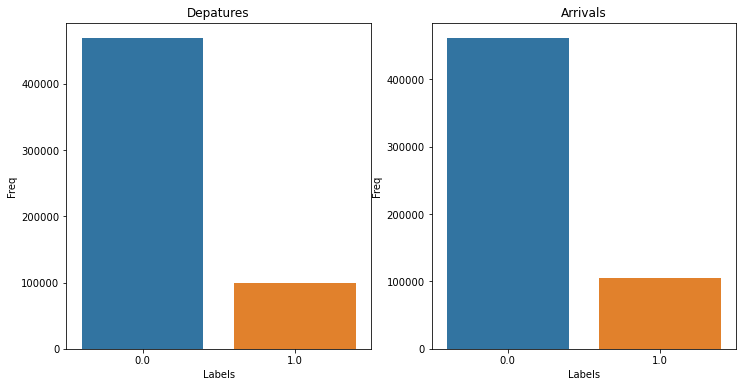

In [15]:
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(flights_jan_2019['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(flights_jan_2019['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

#### Flight delay on week days

Text(0, 0.5, 'Arrival delay (in minutes)')

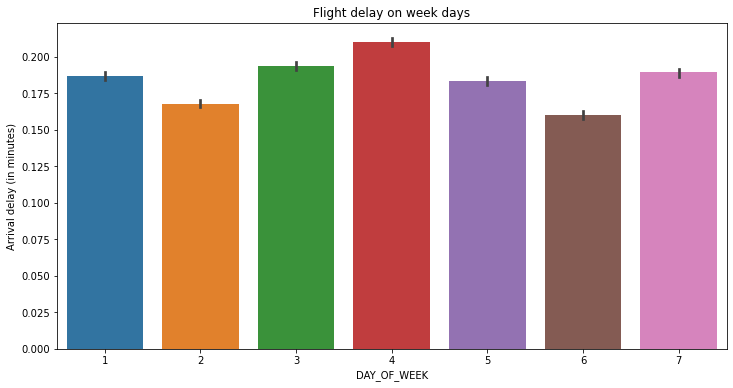

In [17]:
plt.figure(figsize=(12,6))
plt.title("Flight delay on week days")
sns.barplot(x=flights_jan_2019.DAY_OF_WEEK, y=flights_jan_2019['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")

#### Most likely time to have delay during a day.

In [19]:
time_blk = flights_jan_2019[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk['PERCENTUAL'] = time_blk['ARR_DEL15']/(time_blk['ARR_DEL15'].sum())*100
time_blk

,ARR_DEL15,PERCENTUAL
DEP_TIME_BLK,,
1700-1759,8270.0,7.859573
1800-1859,7978.0,7.582065
1600-1659,7576.0,7.200015
1400-1459,7290.0,6.928209
1500-1559,7281.0,6.919656
1900-1959,7219.0,6.860733
1200-1259,6639.0,6.309517
1300-1359,6398.0,6.080477
1100-1159,6361.0,6.045314


Most delays occur between 4:00 pm and 7:00 pm, in the late afternoon.

#### Which airlines have the most percentage of delayed flights?

In [63]:
flights_jan = pd.concat([flights_jan_2019, flights_jan_2020], ignore_index=True)

total_flights = flights_jan['OP_CARRIER'].value_counts()

delayed_flights = flights_jan[flights_jan['ARR_DEL15'] > 0]['OP_CARRIER'].value_counts()
delay_percentage = (delayed_flights / total_flights) * 100
delay_percentage = delay_percentage.sort_values(ascending=False)

print("Airlines with the Highest Percentage of Delayed Flights:")
print(delay_percentage)

Airlines with the Highest Percentage of Delayed Flights:
G4    22.466809
MQ    20.853966
B6    20.556641
EV    19.457890
AS    18.872748
F9    18.798046
OH    18.200008
OO    18.162045
YV    17.765740
YX    16.932104
AA    16.366696
UA    16.147341
9E    15.088060
NK    14.425518
WN    11.955745
DL    11.606012
HA    11.125569
Name: OP_CARRIER, dtype: float64


G4: Allegiant Air.
MQ: Envoy Air.
B6: JetBlue Airways.

#### Which airlines have the most percentage of cancelled flights?

In [69]:
total_flights = flights_jan['OP_CARRIER'].value_counts()
cancelled_flights = flights_jan[flights_jan['CANCELLED'] == 1]['OP_CARRIER'].value_counts()
cancellation_percentage = (cancelled_flights / total_flights) * 100
cancellation_percentage = cancellation_percentage.sort_values(ascending=False)

print("Airlines with the Highest Percentage of Cancelled Flights:")
print(cancellation_percentage)

Airlines with the Highest Percentage of Cancelled Flights:
MQ    5.343070
EV    4.676123
OO    3.146540
WN    2.655123
YX    2.521958
YV    2.133658
OH    2.133620
B6    2.030436
AS    1.674870
AA    1.432551
F9    1.338519
UA    1.042847
NK    0.972507
9E    0.963805
G4    0.935544
DL    0.239761
HA    0.173498
Name: OP_CARRIER, dtype: float64


MQ: Envoy Air.
EV: ExpressJet Airlines.
OO: SkyWest Airlines.

#### Which 'Origin' airport stands out in delay?

In [79]:
# How many origin airports in the dataset?
num_airports = flights_jan_2019['ORIGIN'].nunique()
print("Number of unique airports:", num_airports)

Number of unique airports: 346


In [21]:
origin_later = flights_jan_2019[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
origin_later['PERCENTUAL'] = origin_later['DEP_DEL15']/(origin_later['DEP_DEL15'].sum())*100
origin_later.head()

,DEP_DEL15,PERCENTUAL
ORIGIN,,
ORD,6620.0,6.691803
ATL,4133.0,4.177828
DFW,4044.0,4.087863
LGA,3791.0,3.832119
DEN,3438.0,3.475290


ORD (Chicago O'Hare International Airport), ATL (Atlanta International Airport) and DFW (Dallas Ft Worth International Airport) airports are the ones with the most delays.

#### Is there any relationship between distance and delay?

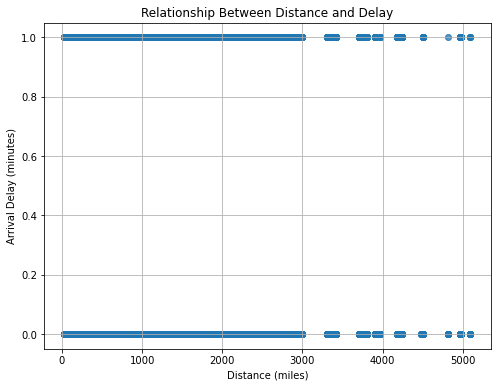

Correlation Coefficient: 0.006920237443392457


In [64]:
# Correlation coefficient
correlation = flights_jan['DISTANCE'].corr(flights_jan['ARR_DEL15'])

plt.figure(figsize=(8, 6))
plt.scatter(flights_jan['DISTANCE'], flights_jan['ARR_DEL15'], alpha=0.5)
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship Between Distance and Delay')
plt.grid(True)
plt.show()
print("Correlation Coefficient:", correlation)

#### Is flight delays differ based on geographical regions or specific routes?

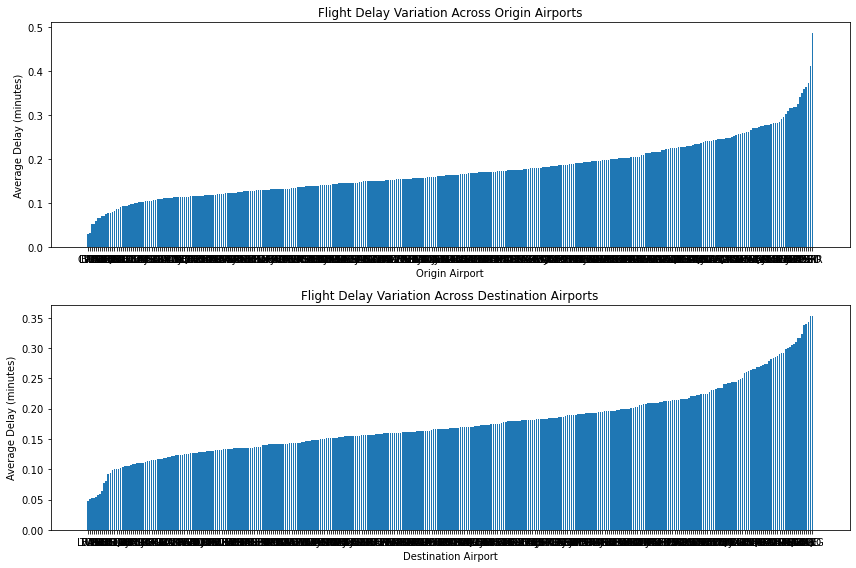

In [68]:
flights_jan = pd.concat([flights_jan_2019, flights_jan_2020], ignore_index=True)

data = flights_jan[['ORIGIN', 'DEST', 'ARR_DEL15']].dropna()
origin_delay = data.groupby('ORIGIN')['ARR_DEL15'].mean()
dest_delay = data.groupby('DEST')['ARR_DEL15'].mean()
origin_delay = origin_delay.sort_values()
dest_delay = dest_delay.sort_values()

fig, axes = plt.subplots(nrows=2, figsize=(12, 8))
axes[0].bar(origin_delay.index, origin_delay.values)
axes[0].set_xlabel('Origin Airport')
axes[0].set_ylabel('Average Delay (minutes)')
axes[0].set_title('Flight Delay Variation Across Origin Airports')

axes[1].bar(dest_delay.index, dest_delay.values)
axes[1].set_xlabel('Destination Airport')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_title('Flight Delay Variation Across Destination Airports')

plt.tight_layout()
plt.show()


### Models for perdiction

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [46]:
# Data pre-processing

# Concatenate the two datasets
flights_jan = pd.concat([flights_jan_2019, flights_jan_2020], ignore_index=True)

# Select relevant features
features = ['OP_CARRIER', 'DEP_DEL15', 'ARR_DEL15']

flights_jan = flights_jan[features].dropna()
flights_jan = pd.get_dummies(flights_jan, columns=['OP_CARRIER'])

In [47]:
# Split the data into training and testing sets. 

X = flights_jan.drop('ARR_DEL15', axis=1)
y = flights_jan['ARR_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [49]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[187667   8028]
 [  9470  27882]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195695
         1.0       0.78      0.75      0.76     37352

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



#### Random Forest Classifier

In [50]:
# Train a Random Forest classifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.924916433165842


In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[187667   8028]
 [  9470  27882]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195695
         1.0       0.78      0.75      0.76     37352

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



#### Gradient Boosting

In [53]:
# Train a Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[187667   8028]
 [  9470  27882]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195695
         1.0       0.78      0.75      0.76     37352

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



#### GaussianNB

In [55]:
# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [56]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[178827  16868]
 [  9036  28316]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    195695
         1.0       0.63      0.76      0.69     37352

    accuracy                           0.89    233047
   macro avg       0.79      0.84      0.81    233047
weighted avg       0.90      0.89      0.89    233047



#### DecisionTreeClassifier

In [57]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [58]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[187667   8028]
 [  9470  27882]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195695
         1.0       0.78      0.75      0.76     37352

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



#### KNeighborsClassifier

In [59]:
# Train a K-Nearest Neighbors classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [60]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[187667   8028]
 [  9470  27882]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195695
         1.0       0.78      0.75      0.76     37352

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



#### Comparision of classifiers 

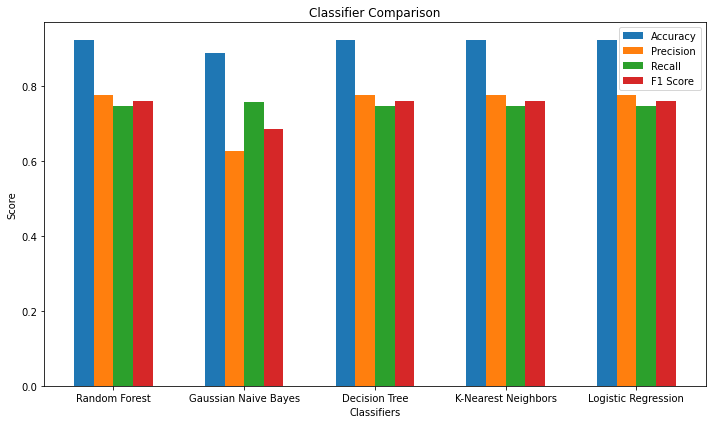

In [61]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(classifiers))


ax.bar(x, accuracy_scores, width=0.15, label='Accuracy')
ax.bar([i + 0.15 for i in x], precision_scores, width=0.15, label='Precision')
ax.bar([i + 0.3 for i in x], recall_scores, width=0.15, label='Recall')
ax.bar([i + 0.45 for i in x], f1_scores, width=0.15, label='F1 Score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_title('Classifier Comparison')
ax.set_xticks([i + 0.225 for i in x])
ax.set_xticklabels([classifier_name for classifier_name, _ in classifiers])
ax.legend()

plt.tight_layout()
plt.show()


In [72]:
#AUC-ROC
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

auc_roc_scores = []
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    auc_roc_scores.append((classifier_name, auc_roc))


auc_roc_scores = sorted(auc_roc_scores, key=lambda x: x[1], reverse=True)

print("AUC-ROC Scores:")
for classifier_name, auc_roc in auc_roc_scores:
    print(f"{classifier_name}: {auc_roc}")


AUC-ROC Scores:
Random Forest: 0.8768314563942383
Decision Tree: 0.8768314563942383
Logistic Regression: 0.8749858402641598
Gaussian Naive Bayes: 0.8605172626116634
K-Nearest Neighbors: 0.8546967116792732


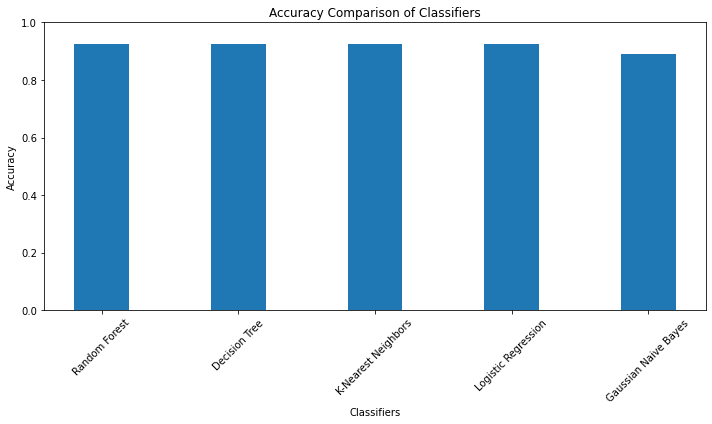

In [74]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

accuracy_scores = []

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((classifier_name, accuracy))

# Sort the scores in descending order
accuracy_scores = sorted(accuracy_scores, key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(classifiers))
accuracy_values = [score for _, score in accuracy_scores]

ax.bar(x, accuracy_values, width=0.4)
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels([classifier_name for classifier_name, _ in accuracy_scores], rotation=45)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


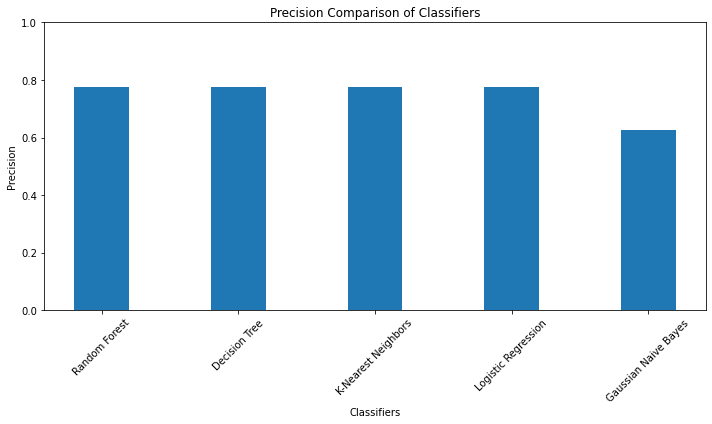

In [75]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]


precision_scores = []

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append((classifier_name, precision))

precision_scores = sorted(precision_scores, key=lambda x: x[1], reverse=True)


fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(classifiers))
precision_values = [score for _, score in precision_scores]

ax.bar(x, precision_values, width=0.4)
ax.set_xlabel('Classifiers')
ax.set_ylabel('Precision')
ax.set_title('Precision Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels([classifier_name for classifier_name, _ in precision_scores], rotation=45)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


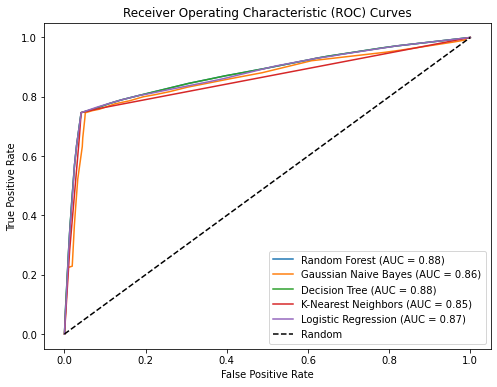

In [76]:
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

plt.figure(figsize=(8, 6))

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc:.2f})')

# Plot the random classifier ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [80]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
          Feature  Importance
0       DEP_DEL15    0.986702
15  OP_CARRIER_WN    0.005208
5   OP_CARRIER_DL    0.002724
10  OP_CARRIER_MQ    0.001273
13  OP_CARRIER_OO    0.000632
4   OP_CARRIER_B6    0.000497
6   OP_CARRIER_EV    0.000444
3   OP_CARRIER_AS    0.000404
16  OP_CARRIER_YV    0.000379
8   OP_CARRIER_G4    0.000338
2   OP_CARRIER_AA    0.000279
17  OP_CARRIER_YX    0.000224
1   OP_CARRIER_9E    0.000200
12  OP_CARRIER_OH    0.000155
14  OP_CARRIER_UA    0.000149
11  OP_CARRIER_NK    0.000142
9   OP_CARRIER_HA    0.000141
7   OP_CARRIER_F9    0.000111


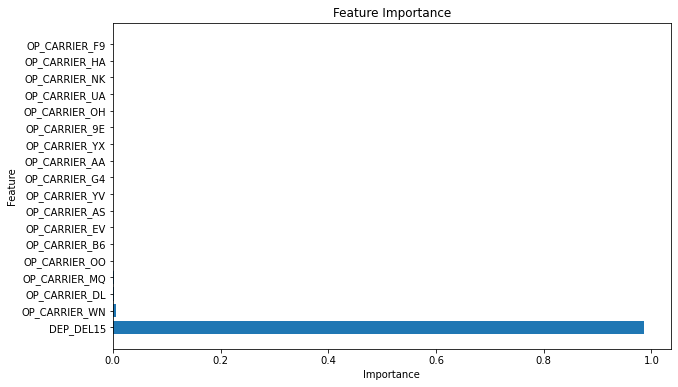

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()